In [ ]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
dataset = pd.read_csv(r'C:\Users\Ajaj\Documents\Data Science\archive\Global_Superstore2.csv', encoding= 'unicode_escape')

In [8]:
dataset.shape

(51290, 24)

In [30]:
dataset.head(4)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,5/2/2013,7/2/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium


In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [10]:
dataset.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [1]:
dataset['Postal Code'].fillna(dataset['Postal Code'].median(), inplace=True)

NameError: name 'dataset' is not defined

In [2]:
dataset['State'].value_counts()[:5]

NameError: name 'dataset' is not defined

In [3]:
top_states = dataset['State'].value_counts()[:5]
print(top_states)
sns.countplot(x="State", data=dataset[dataset['State'].value_counts()[:5]])
plt.show()

NameError: name 'dataset' is not defined

State
California       2001
England          1499
New York         1128
Texas             985
Ile-de-France     981
Name: count, dtype: int64


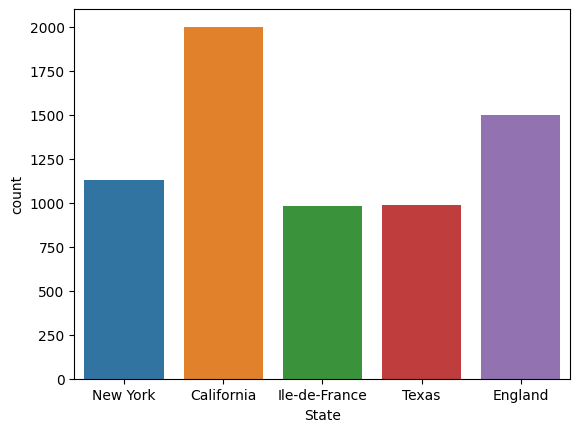

In [55]:
top_states = dataset['State'].value_counts()[:5]
print(top_states)
top_states_list = top_states.index.tolist()
filtered_dataset = dataset[dataset['State'].isin(top_states_list)]
sns.countplot(x="State", data=filtered_dataset,hue="State")
plt.show()

In [4]:
top_states = dataset['State'].value_counts().sort_values(ascending=False)[:5]
print(top_states)
top_states_list = top_states.index.tolist()
filtered_dataset = dataset[dataset['State'].isin(top_states_list)]
sns.countplot(x="State", data=filtered_dataset, order=top_states_list, hue="State")
plt.show()

NameError: name 'dataset' is not defined

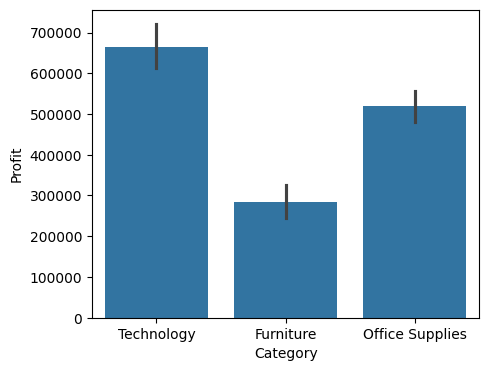

In [36]:
plt.figure(figsize=(5,4))
sns.barplot(x="Category",y="Profit",data=dataset,estimator="sum")
plt.show()

# Customer Segment

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x="Segment",data=dataset)
plt.title("Customer Segment")
plt.savefig("Customer Segment.jpg")
plt.show()

NameError: name 'plt' is not defined

In [9]:
# Our customer is mostly belong from consumer background.

In [ ]:
# From this, we have to found out that our More customers are from the consumer sector

# Product Category

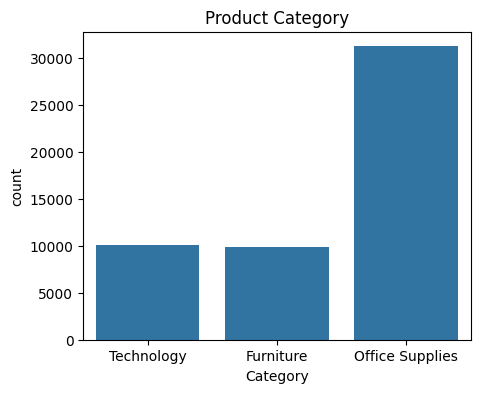

In [13]:
plt.figure(figsize=(5, 4))
sns.countplot(x="Category", data=dataset)
plt.title("Product Category")
plt.savefig("Product_Category.jpg")
plt.show()


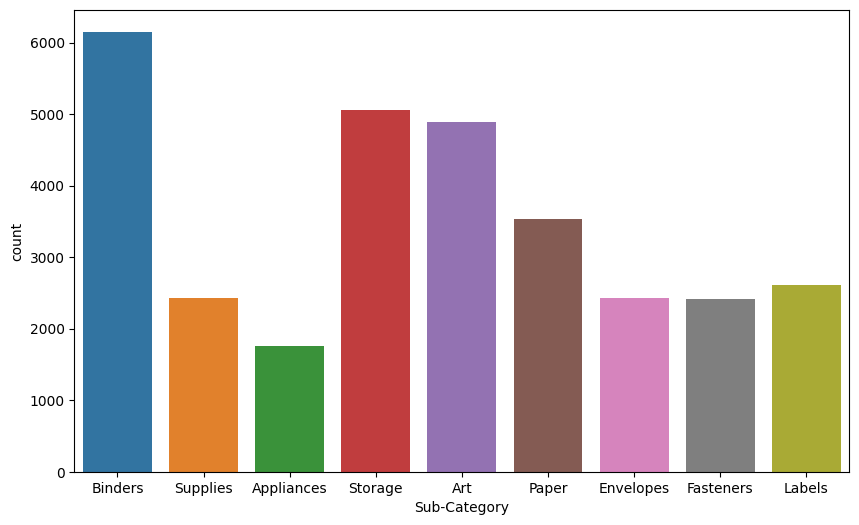

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Sub-Category", data=dataset[dataset["Category"]=="Office Supplies"], hue="Sub-Category")
plt.show()


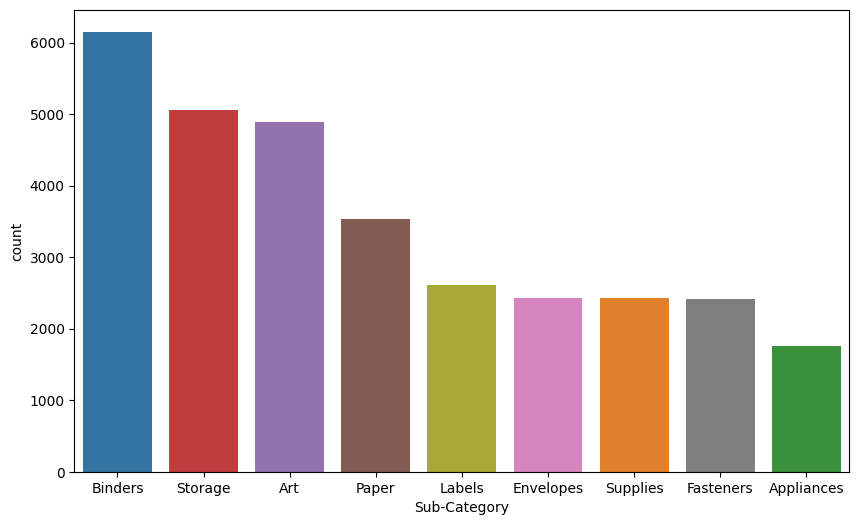

In [59]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Sub-Category", data=dataset[dataset["Category"]=="Office Supplies"], hue="Sub-Category", order=dataset[dataset["Category"]=="Office Supplies"]["Sub-Category"].value_counts().index)
plt.show()


# Ship Mode

In [46]:
dataset['Ship Mode'].value_counts()

Ship Mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64

In [52]:
x = dataset['Ship Mode'].value_counts().index
y = dataset['Ship Mode'].value_counts().values

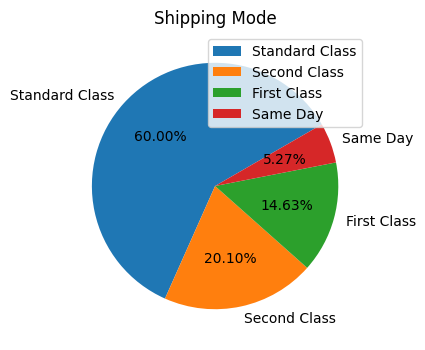

In [83]:
plt.figure(figsize=(5,4))

plt.pie(y,labels=x,startangle = 30,autopct="%0.2f%%")
plt.legend(loc=1)
plt.title("Shipping Mode")
plt.savefig("Shipping Mode.jpg")
plt.show()

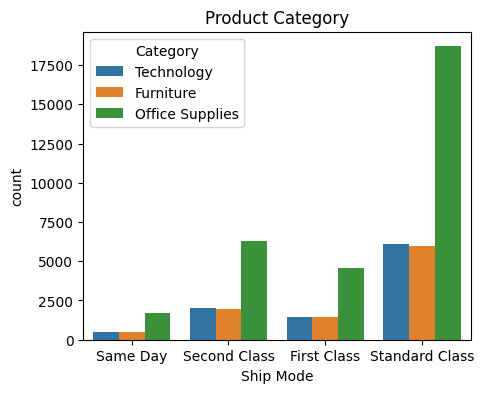

In [84]:
plt.figure(figsize=(5,4))
sns.countplot(x="Ship Mode", data=dataset,hue="Category")
plt.title("Product Category")
plt.savefig("Product Category.jpg")
plt.show()

In [33]:
dataset.shape

(51290, 24)

# Order Priority 

In [37]:
dataset['Order Priority'].value_counts()

Order Priority
Medium    29433
High      15501
Low        6356
Name: count, dtype: int64

In [35]:
dataset['Order Priority'].unique()

array(['Critical', 'Medium', 'High', 'Low'], dtype=object)

In [36]:
dataset['Order Priority'] = dataset['Order Priority'].replace('Critical','Low')

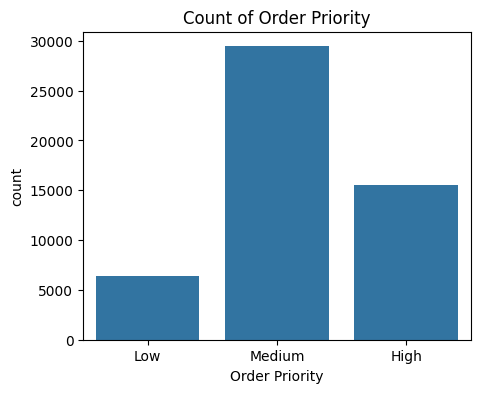

In [43]:
plt.figure(figsize=(5,4))
sns.countplot(x="Order Priority",data=dataset)
plt.title("Count of Order Priority")
plt.savefig("Count of Order Priority.jpg")
plt.show()